# Kernel Lab

### Introduction

In this lesson, we'll continue to work with kernels.  Let's get started.

### Initializing our Kernels

Let's begin by loading our images.

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [9]:
second_image = X[1].reshape(28, 28)

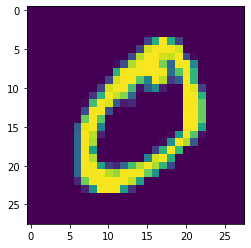

In [10]:
from matplotlib.pyplot import imshow
imshow(second_image)

As we know the image is derived from pixels where the smaller larger the number the lighter the component of the image.

In [24]:
import pandas as pd
second_image_df = pd.DataFrame(second_image)
df_select = second_image_df.loc[1:7,  10:25].astype('int')
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0
5,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0
6,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0
7,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0


Now let's initialize a few different kernels.

In [58]:
import numpy as np
kernel_1 = np.array([[-1,-1,-1],
       [ 0, 0, 0],
       [ 1, 1, 1]])

kernel_2 = np.array([[0, 0, 0],
       [ 0,  1,  1],
       [ 0,  1,  -1]])

kernel_3 = np.array([[-1,0,1],
       [ -1, 0, 1],
       [ -1, 0, 1]])

kernels = [kernel_1, kernel_2, kernel_3]

In [59]:
edge_region = second_image_df.iloc[10:13, 20:23]
edge_region

,20,21,22
10,253.0,243.0,50.0
11,253.0,252.0,165.0
12,253.0,252.0,195.0


Now write the method called `apply_kernel` applies a kernel to a region.

In [60]:
def apply_kernel(kernel, region):
    mult = kernel*region
    return mult.to_numpy().sum()

Let's apply the first kernel to the `edge_region` selected above.

In [68]:
apply_kernel(kernels[0], edge_region)

# 154.0

154.0

Kernels are often referred to as `filters`.  Shuffle through the kernels above.  As we can, it's almost as if a different lens is applied to the image.

In [129]:
def apply_kernel_to_image(kernel, image_df):
    coords = [x_coord for x_coord in range(image_df.shape[0])][1:-1]
    combos = [[(x_coord, y_coord) for x_coord in coords] for y_coord in coords]
    return np.array([apply_kernel(kernel, image_df.loc[x-1:x+1, y-1:y+1])
           for row in combos for x,y in row])

In [130]:
first_kernel = apply_kernel_to_image(kernels[0], second_image_df)

In [131]:
third_kernel = apply_kernel_to_image(kernels[2], second_image_df)

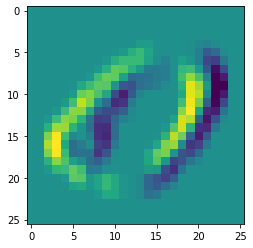

In [132]:
from matplotlib.pyplot import imshow
imshow(first_kernel.reshape(26, 26))

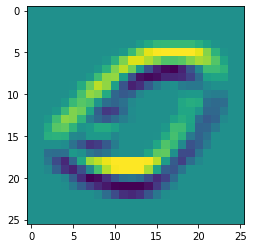

In [133]:
imshow(kernels_3.reshape(26, 26))

So we can see that our different kernels extract different features from the image.  The last kernel appears to focus on the top and bottom curves of our image.  The first kernel focuses on the left and right curves above.